In [64]:
# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# Load two datasets (training and testing):
au_train = pd.read_csv('au_train.csv')
au_test = pd.read_csv('au_test.csv')

In [66]:
# Take the first look at both train and test datasets:
au_train.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [67]:
au_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


# 1. Cleaning Datasets:

The goals of this part are:
1. Check if there are any missing entries.
2. Check if there are any misentried observations (non-sense value).
3. Check for class imbalance.

In [68]:
# Check if there is any misentried class in both datasets:
print(au_test['class'].unique())
print(au_train['class'].unique())

[' <=50K.' ' >50K.']
[' <=50K' ' >50K']


No misentried classes. The class strings are a little different between train and test datasets, so it might be helpful to transform them into consisten classes for easier visualization.

In [69]:
# Transform au_test classes:
au_test['class'] = au_test['class'].map({' <=50K.': ' <=50K',
                                        ' >50K.': ' >50K'})

In [70]:
# Check if there is any missing entry in both datasets:
print(au_train.info())
print(au_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education      

There are no missing entries. These are fairly clean datasets.

In [71]:
# Check if there are any misentried observations (non-sense value):
print(au_train.describe())
print(au_test.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
                age        fnlwgt  education-num  capital-gain 

There are no non-sense values. 90 of age and 99 of hours per week both seem reasonable. 

In [72]:
# Check if classes are imbalanced:
print(au_train['class'].value_counts())
print(au_test['class'].value_counts())

 <=50K    24720
 >50K      7841
Name: class, dtype: int64
 <=50K    12435
 >50K      3846
Name: class, dtype: int64


Classes are somewhat imbalanced. However, the imbalance is not too serious (minor takes up to 31% in both datasets).

# 2. Segmentation and Visualization:

The goals of this part are:
    1. Check if the samples are drawn from the same distribution.
    2. Visualize the segmentation of classes among each feature's levels.
    3. Come up with ideas to encode categorial features for the classification model.

In [73]:
# It is helpful to concatenate au_train and au_test here 
# for a more comprehensive visualization and distribution checking:
au = pd.concat([au_train, au_test])

In [74]:
# Define the segmentation function:
def segmentation(dataset, feature):
    return dataset.groupby(feature)['class'].value_counts().to_frame().rename(index=str, columns={'class': 'count'}).reset_index()

2.1 BY SEXES

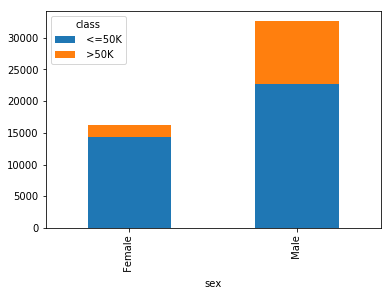

In [78]:
# Segment and plot the segments by sexes:
by_sex = segmentation(au, 'sex')
by_sex.pivot('sex', 'class')['count'].plot(kind='bar', stacked=True)

2.2 BY RACES

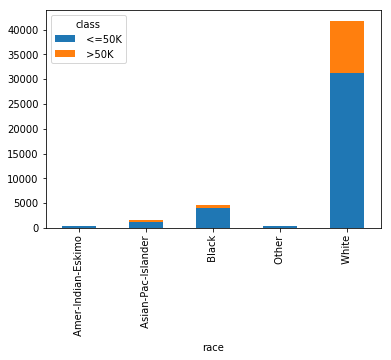

In [77]:
# Segment and plot the segments by races:
by_race = segmentation(au, 'race')
by_race.pivot('race', 'class')['count'].plot(kind='bar', stacked=True)

2.3 BY WORKCLASSES

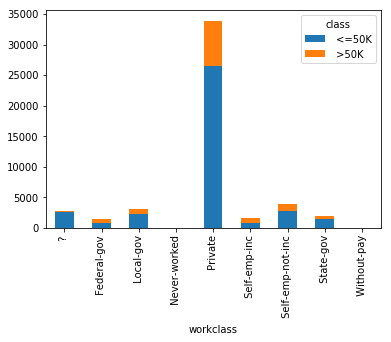

In [83]:
# Segment and plot the segments by workclasses:
by_workclass = segmentation(au, 'workclass')
by_workclass.pivot('workclass', 'class')['count'].plot(kind='bar', stacked=True)

2.4 BY EDUCATION

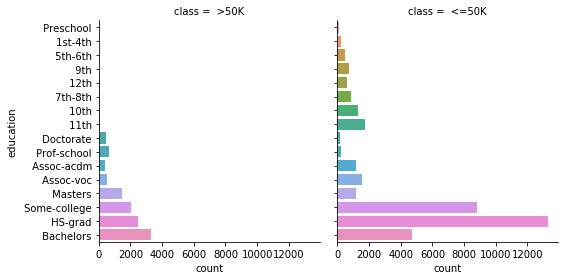

In [87]:
# Segment and plot the segments of income brackets by education:
by_education = segmentation(au, 'education').sort_values('count')
fg = sns.factorplot(x='count', 
                    y='education',
                    col='class', 
                    data=by_education,
                    orient='h',
                    kind='bar')

2.5 BY COUNTRIES

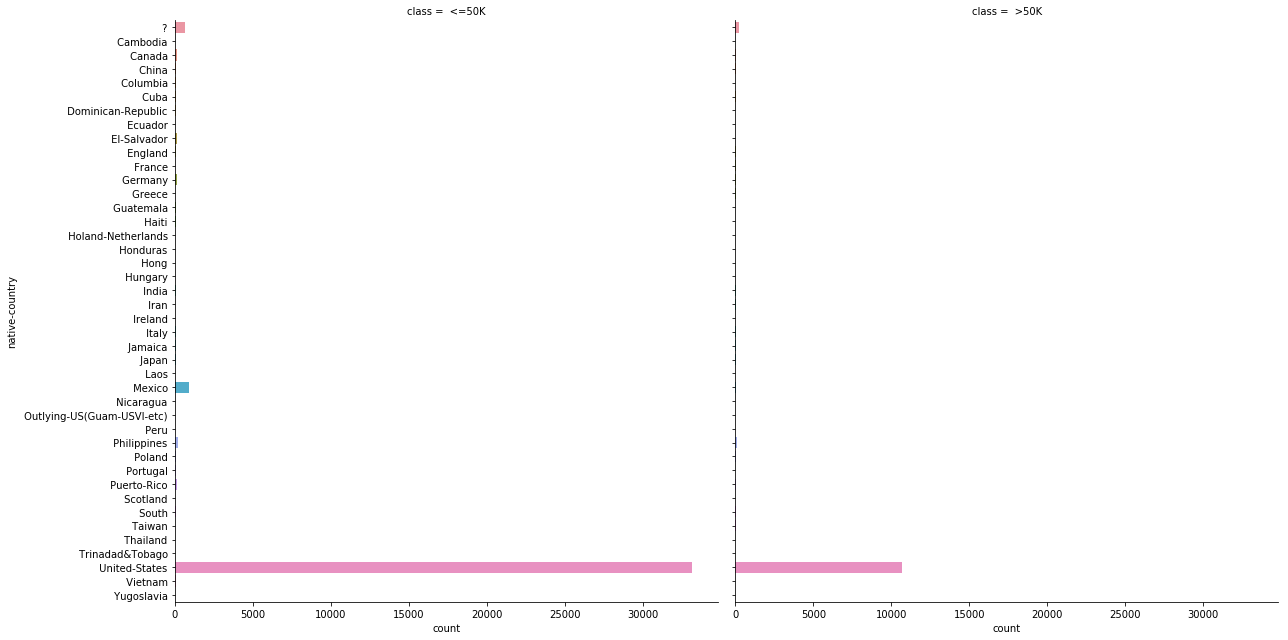

In [88]:
# Segment and plot the segments in income brackets by countries:
by_country = segmentation(au, 'native-country')
fg_1 = sns.factorplot(x='count', 
                    y='native-country',
                    col='class', 
                    data=by_country,
                    orient='h',
                    kind='bar',
                    size=9)

2.6 BY OCCUPATION

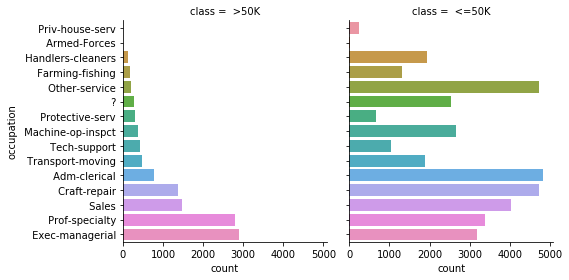

In [91]:
# Segment and plot the segments of income brackets among different occupations:
by_occupation = segmentation(au, 'occupation').sort_values('count')
fg_2 = sns.factorplot(x='count', 
                    y='occupation',
                    col='class', 
                    data=by_occupation,
                    orient='h',
                    kind='bar')

2.7 BY RELATIONSHIP

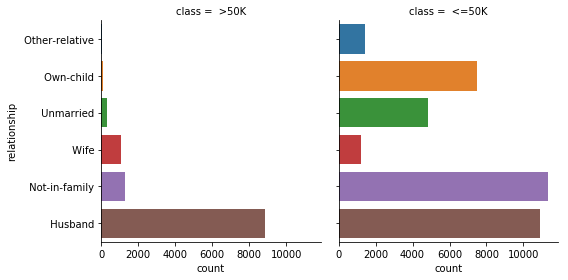

In [92]:
# Segment and plot the segments of income brackets by relationship types:
by_relationship = segmentation(au, 'relationship').sort_values('count')
fg9 = sns.factorplot(x='count', 
                    y='relationship',
                    col='class', 
                    data=by_relationship,
                    orient='h',
                    kind='bar')

2.8 BY MARITAL STATUSES:

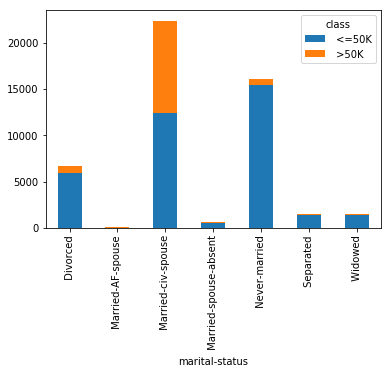

In [93]:
# Segment and plot the segments of income brackets by different marital statuses:
by_marital_status = segmentation(au, 'marital-status')
by_marital_status.pivot('marital-status', 'class')['count'].plot(kind='bar', stacked=True)

2.9 YEARS OF EDUCATION HISTOGRAM

In [94]:
# Because education number, age, capital loss, and gain are all continuous numeric features, I separate
# the dataset into two datasets based on class. Then I plot the histograms of each feature by class in a
# single plot.

In [95]:
# Split the au dataset into two datasets based on classes:
smaller_c = au[au['class'] == ' <=50K']
bigger_c = au[au['class'] != ' <=50K']

In [112]:
# Define the function to plot histograms:
def his_plot(feature):
    plt.hist(smaller_c[feature].astype(int), alpha=0.8, label='<50K')
    plt.hist(bigger_c[feature].astype(int), alpha=0.6, label='>50K')
    plt.legend(loc='upper right')
    plt.title(feature + ' histogram')
    plt.show()

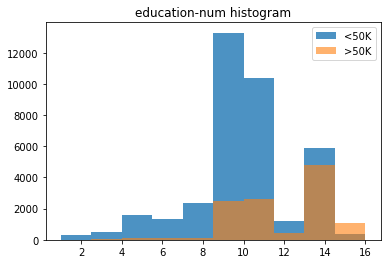

In [114]:
# Plot the years of education histogram:
his_plot('education-num')

2.10 AGE HISTOGRAM

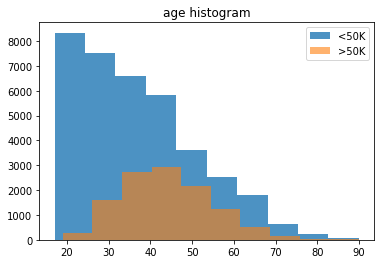

In [116]:
# Plot the age histogram:
his_plot('age')

2.11 WORKING HOURS HISTOGRAM

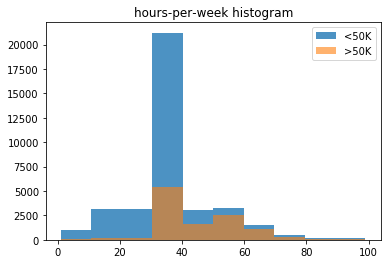

In [117]:
# Plot the age histogram:
his_plot('hours-per-week')

2.12 DEMOGRAPHIC WEIGHTS HISTOGRAM

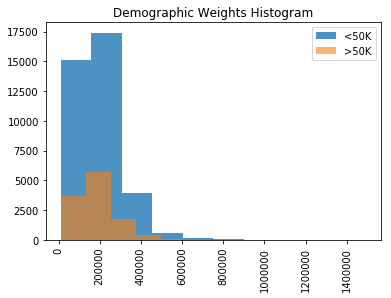

In [126]:
# Plot the demographic weights histogram:
plt.hist(smaller_c['fnlwgt'].astype(int), alpha=0.8, label='<50K')
plt.hist(bigger_c['fnlwgt'].astype(int), alpha=0.6, label='>50K')
plt.legend(loc='upper right')
plt.title('Demographic Weights Histogram')
plt.xticks(rotation='vertical')
plt.show()

2.13 CAPITAL GAIN HISTOGRAM

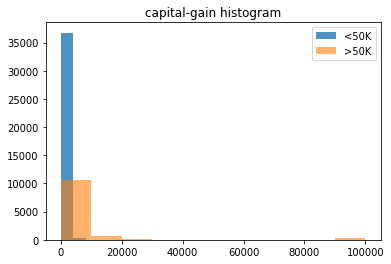

In [124]:
# Plot the capital gain histogram:
his_plot('capital-gain')

2.14 CAPITAL LOSS HISTOGRAM

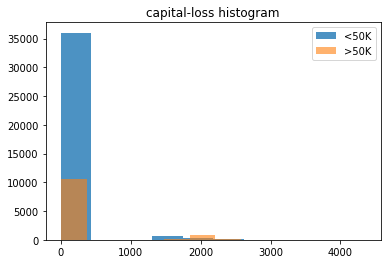

In [128]:
# Plot the capital loss histogram:
his_plot('capital-loss')